## Data Preprocessing

In [65]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

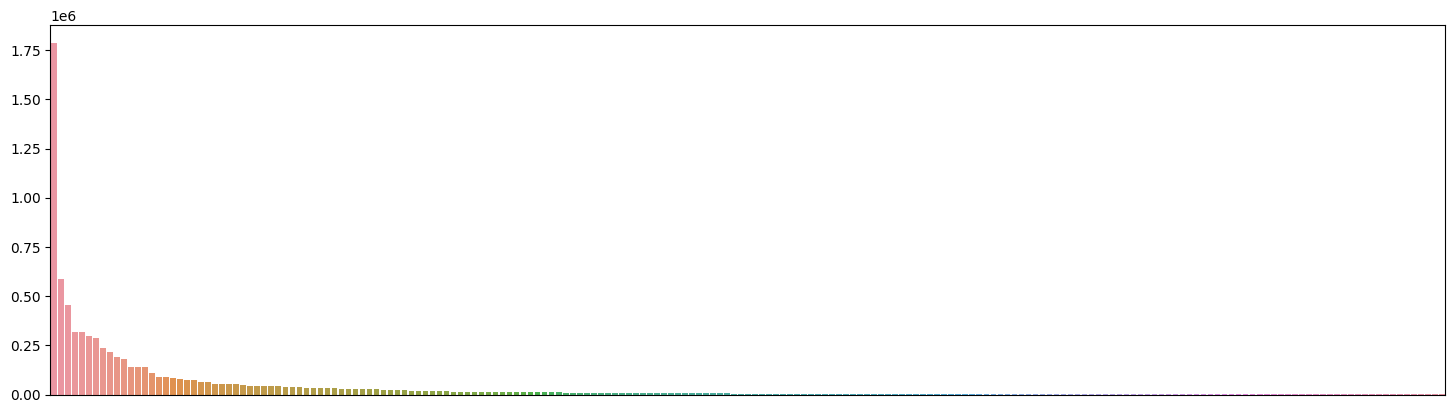

In [66]:
# Read the data
bids_df = pd.read_csv('bids.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')# Count the number of bids from each country
country_counts = bids_df['country'].value_counts()

# Create a bar plot to visualize the distribution of bids by country
fig, ax = plt.subplots(figsize=(18, 4.8))
countries_plot = sns.barplot(x=country_counts.index, y=country_counts.values, ax=ax)

# Hide the x-axis labels to improve readability
ax.get_xaxis().set_visible(False)

# Display the plot
plt.show()


In [67]:
bids_df.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [68]:
train_df.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [69]:
bids_df.shape

(7656334, 9)

In [70]:
bids_df.isnull().sum()

bid_id            0
bidder_id         0
auction           0
merchandise       0
device            0
time              0
country        8859
ip                0
url               0
dtype: int64

In [71]:
missing_percent = bids_df['country'].isnull().mean()
print(f"Percentage of missing data in country column: {missing_percent*100: .2f}%")

Percentage of missing data in country column:  0.12%


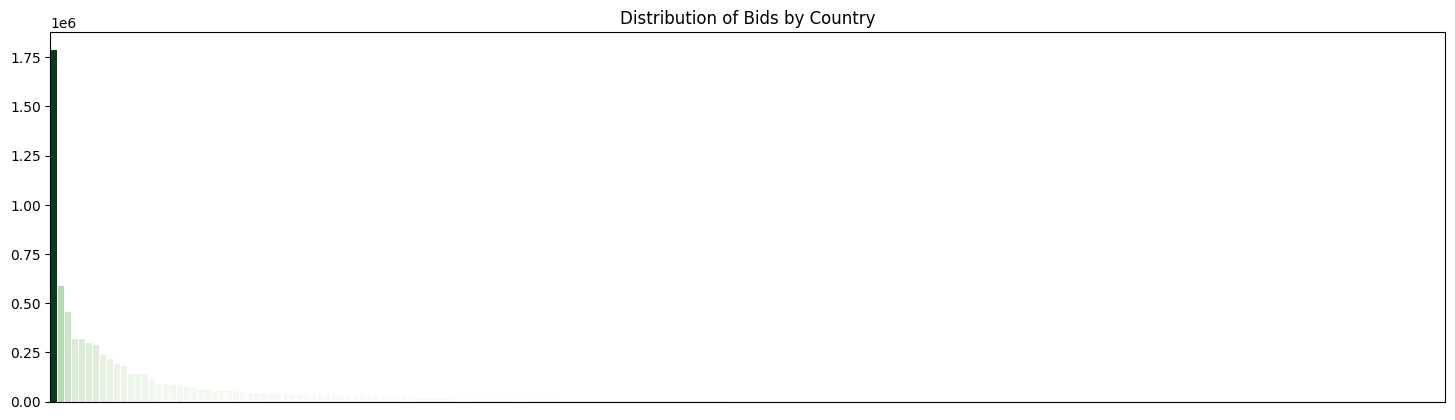

In [72]:
# Count the number of bids from each country
country_counts = bids_df['country'].value_counts()

# Create a bar plot to visualize the distribution of bids by country
fig, ax = plt.subplots(figsize=(18, 4.8))

# Create a custom color map with a gradient
color_map = plt.get_cmap("Greens")
norm = plt.Normalize(country_counts.values.min(), country_counts.values.max())

# Generate the bar plot using the custom gradient color
countries_plot = sns.barplot(x=country_counts.index, y=country_counts.values, ax=ax,
                             palette=color_map(norm(country_counts.values)))

# Hide the x-axis labels to improve readability
ax.get_xaxis().set_visible(False)

# Add a title to the plot
plt.title("Distribution of Bids by Country")

# Display the plot
plt.show()


In [73]:
bids_df['country'] = bids_df['country'].fillna(bids_df['country'].mode()[0])

## Feature Engineering

In [74]:
# Sorting the bids DataFrame based on bidder_id and time
sorted_bids = bids_df.sort_values(['bidder_id', 'time'])
sorted_bids.head(15)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
7179832,7179832,001068c415025a009fee375a12cff4fcnht8y,4ifac,jewelry,phone561,9706345052631578,bn,139.226.147.115,vasstdc27m7nks3
1281292,1281292,002d229ffb247009810828f648afc2ef593rb,2tdw2,mobile,phone640,9766744105263157,sg,37.40.254.131,vasstdc27m7nks3
1281311,1281311,002d229ffb247009810828f648afc2ef593rb,2tdw2,mobile,phone219,9766744210526315,sg,37.40.254.131,vasstdc27m7nks3
6805028,6805028,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,mobile,phone313,9704553947368421,ir,21.67.17.162,vnw40k8zzokijsv
3967330,3967330,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,obbny,mobile,phone420,9640018631578947,id,44.241.8.179,sj4jidex850loas
6166636,6166636,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,mobile,phone102,9700605052631578,id,190.88.89.83,sj4jidex850loas
7140567,7140567,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,mobile,phone257,9705974315789473,id,115.47.140.180,vasstdc27m7nks3
2597846,2597846,00486a11dff552c4bd7696265724ff81yeo9v,no958,home goods,phone4,9632636526315789,ng,143.118.40.162,vasstdc27m7nks3
2599005,2599005,00486a11dff552c4bd7696265724ff81yeo9v,6plix,home goods,phone4,9632641157894736,ng,143.118.40.162,vasstdc27m7nks3
2750709,2750709,00486a11dff552c4bd7696265724ff81yeo9v,gst86,home goods,phone45,9633339684210526,ng,54.212.177.220,0wfuwlacucr1cdl


In [75]:
# Calculating the time differences between consecutive bids for every bidder
time_differences = sorted_bids.groupby('bidder_id')[['time']].diff()
time_differences.head(15)

,time
7179832,NaN
1281292,NaN
1281311,1.052632e+08
6805028,NaN
3967330,NaN
6166636,6.058642e+13
7140567,5.369263e+12
2597846,NaN
2599005,4.631579e+09
2750709,6.985263e+11


In [76]:
# Adding the calculated time differences to the sorted_bids DataFrame
sorted_bids['time_difference'] = time_differences
time_diff_features = sorted_bids[['bidder_id', 'time_difference']].dropna()
time_diff_features.head()

,bidder_id,time_difference
1281311,002d229ffb247009810828f648afc2ef593rb,1.052632e+08
6166636,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,6.058642e+13
7140567,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,5.369263e+12
2599005,00486a11dff552c4bd7696265724ff81yeo9v,4.631579e+09
2750709,00486a11dff552c4bd7696265724ff81yeo9v,6.985263e+11


In [77]:
# Grouping the bid intervals by bidder_id and computing descriptive statistics
bid_stats = time_diff_features.groupby('bidder_id')[['time_difference']].describe().reset_index()
bid_stats.columns = bid_stats.columns.droplevel(level=0)
bid_stats = bid_stats.rename(columns={'': 'bidder_id', 'mean': 'mean_time_diff', 'std': 'std_time_diff', '50%': 'median_time_diff', 'min': 'min_time_diff', 'max': 'max_time_diff'}).fillna(0)
bid_stats['iqr_time_diff'] = bid_stats['75%'] - bid_stats['25%']
bid_stats = bid_stats.drop(['25%', '75%', 'count'], axis=1)
bid_stats.head()

,bidder_id,mean_time_diff,std_time_diff,min_time_diff,median_time_diff,max_time_diff,iqr_time_diff
0,002d229ffb247009810828f648afc2ef593rb,1.052632e+08,0.000000e+00,1.052632e+08,1.052632e+08,1.052632e+08,0.000000e+00
1,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3.297784e+13,3.904443e+13,5.369263e+12,3.297784e+13,6.058642e+13,2.760858e+13
2,00486a11dff552c4bd7696265724ff81yeo9v,4.018413e+12,1.153730e+13,3.684211e+08,9.177368e+11,5.094174e+13,1.696763e+12
3,0051aef3fdeacdadba664b9b3b07e04e4coc6,1.635106e+11,5.770740e+11,5.263158e+07,2.736842e+09,3.792368e+12,1.228947e+10
4,0053b78cde37c4384a20d2da9aa4272aym4pb,7.065316e+09,4.784394e+11,0.000000e+00,3.684211e+08,5.002753e+13,1.000000e+09


In [78]:
# Load the bids dataset
bids_df = pd.read_csv('bids.csv')

# Compute bid statistics by bidder
bid_stats = bids_df.groupby('bidder_id')['bid_id'].agg(['count', 'mean', 'median'])

# Rename the 'mean' and 'median' columns in the bid_stats DataFrame to avoid conflicts with existing column names in train_set
bid_stats = bid_stats.rename(columns={'mean': 'bid_mean', 'median': 'bid_median'})

# Merge the bid_stats DataFrame with train_set and test_set DataFrames
train_set = pd.merge(train_df, bid_stats, on='bidder_id', how='left')
train_set = train_set.fillna(train_df.median())

test_set = pd.merge(test_df, bid_stats, on='bidder_id', how='left')
test_set = test_set.fillna(test_df.median())

C:\Users\egodd\AppData\Local\Temp\ipykernel_30568\2778142480.py:14: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_set = train_set.fillna(train_df.median())
C:\Users\egodd\AppData\Local\Temp\ipykernel_30568\2778142480.py:17: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_set = test_set.fillna(test_df.median())


In [79]:
# Calculating the number of simultaneous bids (bids with a time difference of 0)
simultaneous_bids = time_diff_features[time_diff_features['time_difference'] == 0].groupby('bidder_id').count().reset_index()
simultaneous_bids = simultaneous_bids.rename(columns={'time_difference': 'num_simultaneous_bids'})
simultaneous_bids.head()

,bidder_id,num_simultaneous_bids
0,0053b78cde37c4384a20d2da9aa4272aym4pb,728
1,00a79ebd15f0b24a0a3b5794457cd8ed7dng1,29
2,00b519ec8ed5e370328451379bb708a306eoj,1
3,00e0f614d9dd32dd27f6080f472d2934emlos,15
4,019cf2d366df756c092c91e26f406acdozha7,1


In [80]:
# Merging the simultaneous_bids DataFrame with train_set and test_set DataFrames
train_set = train_set.merge(simultaneous_bids, on='bidder_id', how='left').fillna(0)

test_set = test_set.merge(simultaneous_bids, on='bidder_id', how='left').fillna(0)

In [81]:
# Total number of bids made by each 
num_bids = bids_df.groupby('bidder_id')['bid_id'].count().reset_index().rename(columns={'bid_id': 'num_bids'})
num_bids.head()

# Merging with train_set and test_set
train_set = train_set.merge(num_bids, on='bidder_id', how='left').fillna(0)
test_set = test_set.merge(num_bids, on='bidder_id', how='left').fillna(0)

In [82]:
# Count the number of auctions for each bidder
num_auct = bids_df.groupby('bidder_id')['auction'].nunique().reset_index()
num_auct = num_auct.rename(columns={'auction': 'num_auct'})

# Merge the num_auct DataFrame with train_set and test_set
train_set = train_set.merge(num_auct, on='bidder_id', how='left')
test_set = test_set.merge(num_auct, on='bidder_id', how='left').fillna(0)

In [83]:
# Count the number of unique device types for each bidder
num_device_type = bids_df.groupby('bidder_id')['device'].nunique().reset_index()
num_device_type = num_device_type.rename(columns={'device': 'num_device_type'})

# Merge the num_device_type DataFrame with train_set and test_set
train_set = train_set.merge(num_device_type, on='bidder_id', how='left')
test_set = test_set.merge(num_device_type, on='bidder_id', how='left').fillna(0)

In [84]:
# Count the number of unique URLs for each bidder
num_url = bids_df.groupby('bidder_id')['url'].nunique().reset_index()
num_url = num_url.rename(columns={'url': 'num_url'})

# Merge the num_url DataFrame with train_set
train_set = train_set.merge(num_url, on='bidder_id', how='left')
test_set = test_set.merge(num_url, on='bidder_id', how='left')

In [85]:
# Total number of unique IPs and countries for each bidder_id
num_ip_ctry = bids_df.groupby('bidder_id')[['ip', 'country']].nunique().reset_index().rename(columns={'ip': 'num_ip', 'country': 'num_ctry'})

# Merging with train_set and test_set
train_set = train_set.merge(num_ip_ctry, on='bidder_id', how='left').fillna(0)
test_set = test_set.merge(num_ip_ctry, on='bidder_id', how='left').fillna(0)

In [86]:
# Maximum number of bids per device for each bidder_id
max_bids_per_device = bids_df.groupby(['bidder_id', 'device'])['bid_id'].count().reset_index().groupby('bidder_id')['bid_id'].max().reset_index().rename(columns={'bid_id': 'max_bids_per_device'})

# Merging with train_set and test_set
train_set = train_set.merge(max_bids_per_device, on='bidder_id', how='left').fillna(0)
test_set = test_set.merge(max_bids_per_device, on='bidder_id', how='left').fillna(0)

In [87]:
# Sorting bids by auction and time, then counting the number of first bids for each bidder
sorted_first_bids = bids_df.sort_values(['auction', 'time'])
first_bids = sorted_first_bids.groupby('auction').first().reset_index()
first_bids_count = first_bids.groupby('bidder_id').count()['bid_id'].reset_index()
first_bids_count = first_bids_count.rename(columns={'bid_id': 'num_first_bids'})
first_bids_count.head()

,bidder_id,num_first_bids
0,0053b78cde37c4384a20d2da9aa4272aym4pb,4
1,00a79ebd15f0b24a0a3b5794457cd8ed7dng1,7
2,00e0f614d9dd32dd27f6080f472d2934emlos,6
3,019cf2d366df756c092c91e26f406acdozha7,2
4,01cda526658455000913950f20cf31a2q6nsf,8


In [88]:
# Sorting bids by auction and time in descending order, then counting the number of last bids for each bidder
sorted_last_bids = bids_df.sort_values(['auction', 'time'], ascending=[True, False])
last_bids = sorted_last_bids.groupby('auction').first().reset_index()
last_bids_count = last_bids.groupby('bidder_id').count()['bid_id'].reset_index()
last_bids_count = last_bids_count.rename(columns={'bid_id': 'num_last_bids'})
last_bids_count.head()

,bidder_id,num_last_bids
0,0053b78cde37c4384a20d2da9aa4272aym4pb,6
1,00b519ec8ed5e370328451379bb708a306eoj,1
2,00e0f614d9dd32dd27f6080f472d2934emlos,3
3,01067975436d123f717ee5aba0dd4bbfa0937,1
4,0113d101ec6aabd354adac645a1ec3e82ln88,1


In [89]:
# Check if 'bidder_id' exists in train_set dataframe
if 'bidder_id' in train_set.columns:
    # Merging the first_bids_count and last_bids_count DataFrames with the train_set and test_set DataFrames
    train_set = train_set.merge(first_bids_count, on='bidder_id', how='left').fillna(0)
    train_set = train_set.merge(last_bids_count, on='bidder_id', how='left').fillna(0)

# Check if 'bidder_id' exists in test_set dataframe
if 'bidder_id' in test_set.columns:
    test_set = test_set.merge(first_bids_count, on='bidder_id', how='left').fillna(0)
    test_set = test_set.merge(last_bids_count, on='bidder_id', how='left').fillna(0)

In [90]:
# Calculate auction duration
auct_duration = bids_df.sort_values(['auction', 'time'])[['bidder_id', 'auction', 'time']]
auct_duration = auct_duration[['auction','time']].groupby('auction').agg([max,min]).reset_index().droplevel(axis=1, level=0).rename(columns={'': 'auction'})
auct_duration['auct_duration'] = auct_duration['max'] - auct_duration['min']
auct_duration.head()

,auction,max,min,auct_duration
0,00270,9709212894736842,9699049894736842,10163000000000
1,008vv,9760397157894736,9759369421052631,1027736842105
2,00cwr,9698636578947368,9695641631578947,2994947368421
3,00do0,9759865210526315,9759323842105263,541368421052
4,00hjy,9772723842105263,9759410368421052,13313473684211


In [91]:
# Calculate bid ratios in the first and second half of auctions
time_ratio = bids_df.sort_values(['auction', 'time'])[['bidder_id', 'auction', 'time']]
time_ratio = time_ratio.merge(auct_duration, on='auction', how='left')
time_ratio['temp'] = time_ratio['time'] - time_ratio['auct_duration'] / 2
time_ratio['firsthalf'] = time_ratio['temp'] < time_ratio['min']

In [92]:
# Aggregate bid ratios
ratio_firsthalf = time_ratio[['bidder_id', 'firsthalf']].groupby('bidder_id').agg(['count', sum]).reset_index().droplevel(axis=1, level=0).rename(columns={'': 'bidder_id', 'count': 'num_total_bids', 'sum': 'num_firsthalf_bids'})
ratio_firsthalf['num_secondhalf_bids'] = ratio_firsthalf['num_total_bids'] - ratio_firsthalf['num_firsthalf_bids']

In [93]:
print(train_set.columns)

Index(['bidder_id', 'payment_account', 'address', 'outcome', 'count',
       'bid_mean', 'bid_median', 'num_simultaneous_bids', 'num_bids',
       'num_auct', 'num_device_type', 'num_url', 'num_ip', 'num_ctry',
       'max_bids_per_device', 'num_first_bids', 'num_last_bids'],
      dtype='object')


In [94]:
# Calculate various ratios and percentages for train_set
if 'num_simultaneous_bids' not in train_set.columns:
    print("Missing 'num_simultaneous_bids' column in train_set.")
else:
    train_set['percent_simultaneous_bids'] = train_set['num_simultaneous_bids'] / train_set['num_bids']
if 'num_bids' not in train_set.columns:
    print("Missing 'num_bids' column in train_set.")
else:
    train_set['bids_per_auct'] = train_set['num_bids'] / train_set['num_auct']
    train_set['bids_per_device'] = train_set['num_bids'] / train_set['num_device_type']
    train_set['bids_per_url'] = train_set['num_bids'] / train_set['num_url']
if 'num_auct' not in train_set.columns:
    print("Missing 'num_auct' column in train_set.")
else:
    train_set['device_per_auct'] = train_set['num_device_type'] / train_set['num_auct']
if 'num_ip' not in train_set.columns or 'num_ctry' not in train_set.columns:
    print("Missing 'num_ip' or 'num_ctry' columns in train_set.")
else:
    train_set['ip_per_ctry'] = train_set['num_ip'] / train_set['num_ctry']
if 'max_bids_per_device' not in train_set.columns:
    print("Missing 'max_bids_per_device' column in train_set.")
else:
    train_set['percent_max_bids'] = train_set['max_bids_per_device'] / train_set['num_bids']

In [95]:
# Fill any NaN values with 0 for train_set
train_set = train_set.fillna(0)

In [96]:
# Calculate various ratios and percentages for test_set
if 'num_simultaneous_bids' not in test_set.columns:
    print("Missing 'num_simultaneous_bids' column in test_set.")
else:
    test_set['percent_simultaneous_bids'] = test_set['num_simultaneous_bids'] / test_set['num_bids']
    
if 'num_bids' not in test_set.columns:
    print("Missing 'num_bids' column in test_set.")
else:
    test_set['bids_per_auct'] = test_set['num_bids'] / test_set['num_auct']
    test_set['bids_per_device'] = test_set['num_bids'] / test_set['num_device_type']
    test_set['bids_per_url'] = test_set['num_bids'] / test_set['num_url']
    
if 'num_auct' not in test_set.columns:
    print("Missing 'num_auct' column in test_set.")
else:
    test_set['device_per_auct'] = test_set['num_device_type'] / test_set['num_auct']
    
if 'num_ip' not in test_set.columns or 'num_ctry' not in test_set.columns:
    print("Missing 'num_ip' or 'num_ctry' columns in test_set.")
else:
    test_set['ip_per_ctry'] = test_set['num_ip'] / test_set['num_ctry']
    
if 'max_bids_per_device' not in test_set.columns:
    print("Missing 'max_bids_per_device' column in test_set.")
else:
    test_set['percent_max_bids'] = test_set['max_bids_per_device'] / test_set['num_bids']


In [97]:
# Fill any NaN values with 0 for test_set
test_set = test_set.fillna(0)

Outliers:
                                  bidder_id  num_bids
0     001068c415025a009fee375a12cff4fcnht8y         1
2     0030a2dd87ad2733e0873062e4f83954mkj86         1
9     009479273c288b1dd096dc3087653499lrx3c         1
16    00dd948c3a88f7b68f1952dbeeac68ffb6qoc         1
27    0176025cc599cb59f825d592b8ef3ee3p5aqv         1
...                                     ...       ...
6587  fecea7c93f6fc416ab1165267723b0bewb7le         1
6596  ff375d34745157a44e3ba3de0f30dd1bhypuh         1
6600  ff5069626488d0409be146cff3f1f2eak2n7a         1
6611  ffd29eb307a4c54610dd2d3d212bf3bagmmpl         1
6613  fff2c070d8200e0a09150bd81452ce29ngcnv         1

[1057 rows x 2 columns]


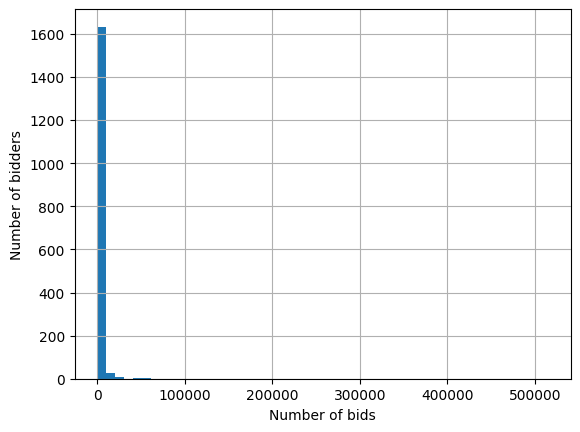

In [98]:
# Load data
bids = pd.read_csv('bids.csv')

# Identify outliers with only one bid
num_bids = bids.groupby('bidder_id')['bid_id'].count().reset_index(name='num_bids')
outliers = num_bids[num_bids['num_bids'] == 1]

# Print outliers
print('Outliers:')
print(outliers)

# Remove outliers
bids = bids[~bids['bidder_id'].isin(outliers['bidder_id'])]

# Load train data
train = pd.read_csv('train.csv')
train = train.rename(columns={'outcome': 'bot'})

# Merge bids with train to get outcome for each bidder
bids_with_outcome = bids.merge(train[['bidder_id', 'bot']], on='bidder_id')

# Aggregate number of bids per bidder with outcome
num_bids_with_outcome = bids_with_outcome.groupby('bidder_id')['bid_id'].count().reset_index(name='num_bids')

# Plot histogram
fig, ax = plt.subplots()
num_bids_with_outcome['num_bids'].hist(ax=ax, bins=50)
ax.set_xlabel('Number of bids')
ax.set_ylabel('Number of bidders')
plt.show()


In [99]:
# Read in the bids and train data
bids = pd.read_csv('bids.csv')
train = pd.read_csv('train.csv')

# Identify the bots and humans
bots = train[train['outcome'] == 1]['bidder_id']
humans = train[train['outcome'] == 0]['bidder_id']

# Filter the bids for bots and humans
bot_bids = bids[bids['bidder_id'].isin(bots)]
human_bids = bids[bids['bidder_id'].isin(humans)]

# Count the occurrences of each merchandise category for bots and humans
bot_merchandise_counts = bot_bids['merchandise'].value_counts()
human_merchandise_counts = human_bids['merchandise'].value_counts()

# Print the merchandise counts for bots and humans
print("Merchandise counts for bots:\n", bot_merchandise_counts)
print("Merchandise counts for humans:\n", human_merchandise_counts)

# Investigate the merchandise feature
print(bids['merchandise'].value_counts())

Merchandise counts for bots:
 sporting goods      230326
mobile              105138
jewelry              37101
home goods           18708
computers            11667
office equipment      7967
books and music       1509
Name: merchandise, dtype: int64
Merchandise counts for humans:
 sporting goods      939398
jewelry             555634
mobile              492350
home goods          389249
office equipment    160671
furniture            87807
books and music      13733
auto parts            9757
computers             9733
clothing               476
Name: merchandise, dtype: int64
mobile              2126587
jewelry             1902058
sporting goods      1855207
home goods          1224234
office equipment     289838
furniture             99181
computers             81084
books and music       51941
clothing              16447
auto parts             9757
Name: merchandise, dtype: int64


In [100]:
# Load data
train = pd.read_csv('train.csv')
bids = pd.read_csv('bids.csv')

# Merge bids with train to get outcome for each bidder
bids_with_outcome = bids.merge(train[['bidder_id', 'outcome']], on='bidder_id')

# Get the top 3 merchandises bidded by humans and bots
top_merchandises = bids_with_outcome.groupby(['merchandise', 'outcome'])['bid_id'].count().reset_index(name='count')
top_merchandises = top_merchandises.pivot(index='merchandise', columns='outcome', values='count').fillna(0)
top_merchandises['total'] = top_merchandises.sum(axis=1)
top_merchandises = top_merchandises.sort_values('total', ascending=False).head(3)

print(top_merchandises)


outcome              0.0       1.0      total
merchandise                                  
sporting goods  939398.0  230326.0  1169724.0
mobile          492350.0  105138.0   597488.0
jewelry         555634.0   37101.0   592735.0


In [101]:
# Compute the number of bids for each bidder
num_bids_per_bidder = bids.groupby('bidder_id')['bid_id'].count().reset_index(name='num_bids')

# Merge with the bids_with_outcome
bids_with_outcome = bids_with_outcome.merge(num_bids_per_bidder, on='bidder_id', how='left').fillna(0)

In [102]:
print(bids.columns)

Index(['bid_id', 'bidder_id', 'auction', 'merchandise', 'device', 'time',
       'country', 'ip', 'url'],
      dtype='object')


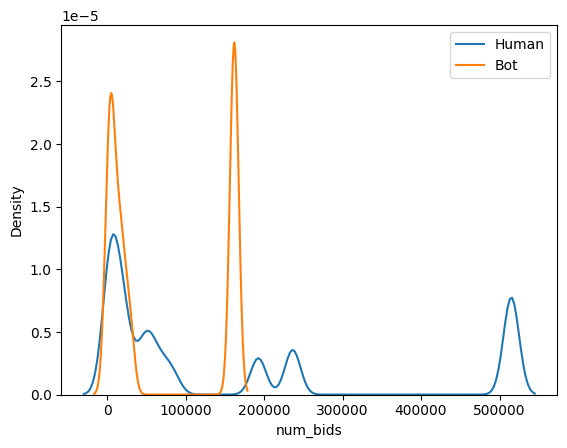

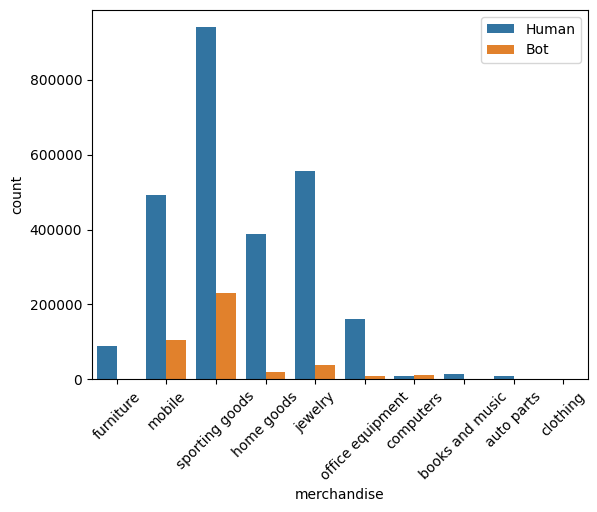

In [103]:
# Select features to plot
features = ['num_bids', 'merchandise']

# Generate density plots for each feature
# Generate density plot for num_bids
plt.figure()
sns.kdeplot(bids_with_outcome.loc[bids_with_outcome['outcome'] == 0, 'num_bids'], label='Human')
sns.kdeplot(bids_with_outcome.loc[bids_with_outcome['outcome'] == 1, 'num_bids'], label='Bot')
plt.xlabel('num_bids')
plt.legend()
plt.show()

# Generate count plot for merchandise
plt.figure()
sns.countplot(data=bids_with_outcome, x='merchandise', hue='outcome')
plt.xlabel('merchandise')
plt.legend(['Human', 'Bot'])
plt.xticks(rotation=45)
plt.show()


## Model Validation

In [108]:
print(train.columns)

Index(['bidder_id', 'payment_account', 'address', 'outcome'], dtype='object')


In [112]:
# Create RandomOverSampler object to oversample minority class
oversampler = RandomOverSampler()

# Create a DataFrame containing only the features
features = train_set[['count', 'bid_mean', 'bid_median', 'num_simultaneous_bids', 'num_bids',
                      'num_auct', 'num_device_type', 'num_url', 'num_ip', 'num_ctry',
                      'max_bids_per_device', 'num_first_bids', 'num_last_bids',
                      'percent_simultaneous_bids', 'bids_per_auct', 'bids_per_device',
                      'bids_per_url', 'device_per_auct', 'ip_per_ctry', 'percent_max_bids']]

# Replace infinite values with NaN
features = features.replace([np.inf, -np.inf], np.nan)

# Fill missing values with median of respective columns
features_filled = features.fillna(features.median())

# Create a Series containing the target variable ('outcome' column)
target = train_set['outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_filled, target, test_size=0.3, random_state=42)

# Oversample the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Define a function to perform hyperparameter tuning for a single Random Forest model
def tune_model(X, y):
    # Define parameter grid for GridSearchCV
    param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
    # Create RandomForestClassifier object
    rf = RandomForestClassifier(random_state=42)
    # Create GridSearchCV object
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
    # Fit GridSearchCV object to data
    grid_search.fit(X, y)
    # Print best hyperparameters and corresponding accuracy score
    print('Best hyperparameters:', grid_search.best_params_)
    print('Accuracy:', grid_search.best_score_)

# Perform hyperparameter tuning for each model
for i in range(5):
    # Set different random_state for each model
    random_state = 42 + i
    # Create RandomForestClassifier object with given random_state
    rf = RandomForestClassifier(random_state=random_state)
    # Train the model on the oversampled training data
    rf.fit(X_train_resampled, y_train_resampled)
    # Make predictions on the testing data
    y_pred = rf.predict(X_test)
    # Print classification report and accuracy score
    print('Model', i+1, 'Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Model', i+1, 'Accuracy Score:', accuracy_score(y_test, y_pred))
    # Perform hyperparameter tuning for the model
    tune_model(X_train_resampled, y_train_resampled)

Model 1 Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       577
         1.0       0.60      0.33      0.43        27

    accuracy                           0.96       604
   macro avg       0.78      0.66      0.70       604
weighted avg       0.95      0.96      0.95       604

Model 1 Accuracy Score: 0.9602649006622517
Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.9872490531301163
Model 2 Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       577
         1.0       0.56      0.33      0.42        27

    accuracy                           0.96       604
   macro avg       0.77      0.66      0.70       604
weighted avg       0.95      0.96      0.95       604

Model 2 Accuracy Score: 0.9586092715231788
Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1

In [116]:
# Load data
bids = pd.read_csv('bids.csv')

# Remove outliers
outliers = bids.groupby('bidder_id').size().reset_index(name='num_bids')
outliers = outliers[outliers['num_bids'] == 1]['bidder_id']
bids = bids[~bids['bidder_id'].isin(outliers)]

# Use train_set DataFrame
train = train_set

# Replace infinite values with NaN
train = train.replace([np.inf, -np.inf], np.nan)

# Fill missing values with the mean
train = train.fillna(train.mean())

# Define features
features = ['count', 'bid_mean', 'bid_median', 'num_simultaneous_bids', 'num_bids',
            'num_auct', 'num_device_type', 'num_url', 'num_ip', 'num_ctry',
            'max_bids_per_device', 'num_first_bids', 'num_last_bids',
            'percent_simultaneous_bids', 'bids_per_auct', 'bids_per_device',
            'bids_per_url', 'device_per_auct', 'ip_per_ctry', 'percent_max_bids']

# Separate features and target
X = train[features]
y = train['outcome']

# Perform over-sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Initialize base models
rf1 = RandomForestClassifier(random_state=1)
rf2 = RandomForestClassifier(random_state=2)
rf3 = RandomForestClassifier(random_state=3)

# Calculate AUC for each base model
for model in [rf1, rf2, rf3]:
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, y_pred)
    print(f"AUC for model with random state {model.random_state}: {auc}")



C:\Users\egodd\AppData\Local\Temp\ipykernel_30568\797303328.py:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train = train.fillna(train.mean())


AUC for model with random state 1: 1.0
AUC for model with random state 2: 1.0
AUC for model with random state 3: 1.0


In [117]:
# Initialize the model
rfc = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rfc.fit(X_train_resampled, y_train_resampled)

# Predict the probabilities of class 1 (bot)
y_pred_prob = rfc.predict_proba(X_test)[:, 1]

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC score:", auc_score)


AUC score: 0.8899159124462417


In [118]:
# Initialize the models with different random states
rfc1 = RandomForestClassifier(random_state=42)
rfc2 = RandomForestClassifier(random_state=10)
rfc3 = RandomForestClassifier(random_state=123)

# Fit the models on the training data
rfc1.fit(X_train_resampled, y_train_resampled)
rfc2.fit(X_train_resampled, y_train_resampled)
rfc3.fit(X_train_resampled, y_train_resampled)

# Predict the probabilities of class 1 (bot) for each model
y_pred_prob1 = rfc1.predict_proba(X_test)[:, 1]
y_pred_prob2 = rfc2.predict_proba(X_test)[:, 1]
y_pred_prob3 = rfc3.predict_proba(X_test)[:, 1]

# Ensemble averaging by taking the mean of the probabilities
y_pred_prob = (y_pred_prob1 + y_pred_prob2 + y_pred_prob3) / 3

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC score:", auc_score)


AUC score: 0.8878297708453687


In [119]:
# Initialize the model
rfc = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='roc_auc')

# Fit GridSearchCV on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and AUC score
print("Best hyperparameters:", grid_search.best_params_)
print("AUC score:", grid_search.best_score_)


Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
AUC score: 1.0


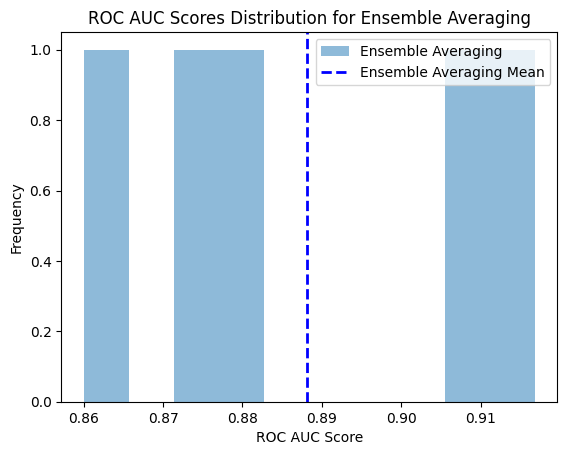

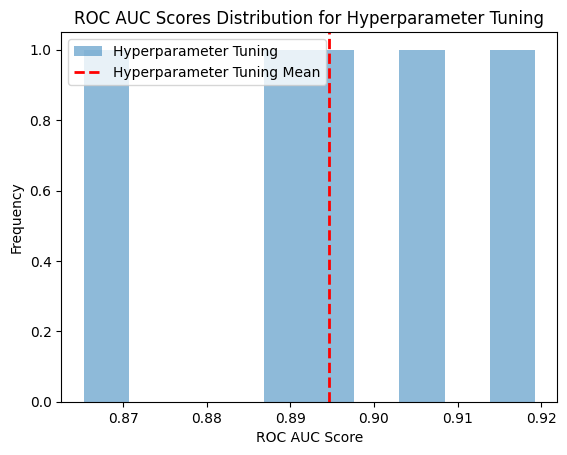

In [122]:
# Initialize StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Create empty lists to store the ensemble_scores and grid_search_scores
ensemble_scores = []
grid_search_scores = []

# Loop through the splits created by StratifiedKFold
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Perform over-sampling
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

    # Ensemble averaging
    rfc1.fit(X_train_resampled, y_train_resampled)
    rfc2.fit(X_train_resampled, y_train_resampled)
    rfc3.fit(X_train_resampled, y_train_resampled)

    y_pred_prob1 = rfc1.predict_proba(X_test)[:, 1]
    y_pred_prob2 = rfc2.predict_proba(X_test)[:, 1]
    y_pred_prob3 = rfc3.predict_proba(X_test)[:, 1]

    y_pred_prob = (y_pred_prob1 + y_pred_prob2 + y_pred_prob3) / 3
    ensemble_auc_score = roc_auc_score(y_test, y_pred_prob)
    ensemble_scores.append(ensemble_auc_score)

    # Hyperparameter tuning
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_model = grid_search.best_estimator_
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]
    grid_search_auc_score = roc_auc_score(y_test, y_pred_prob)
    grid_search_scores.append(grid_search_auc_score)

# Plot ROC AUC score distribution for ensemble averaging
plt.hist(ensemble_scores, alpha=0.5, label='Ensemble Averaging')
plt.axvline(x=np.mean(ensemble_scores), color='b', linestyle='dashed', linewidth=2, label='Ensemble Averaging Mean')
plt.title('ROC AUC Scores Distribution for Ensemble Averaging')
plt.xlabel('ROC AUC Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot ROC AUC score distribution for hyperparameter tuning
plt.hist(grid_search_scores, alpha=0.5, label='Hyperparameter Tuning')
plt.axvline(x=np.mean(grid_search_scores), color='r', linestyle='dashed', linewidth=2, label='Hyperparameter Tuning Mean')
plt.title('ROC AUC Scores Distribution for Hyperparameter Tuning')
plt.xlabel('ROC AUC Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## Final Model

In [125]:
# Define the final models
final_models = [RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42), 
                RandomForestClassifier(n_estimators=200, max_depth=10, random_state=123),
                RandomForestClassifier(n_estimators=300, max_depth=12, random_state=456)]

# Fit the models and store their predictions on the test set
proba = []
for model in final_models:
    model.fit(X_resampled, y_resampled)
    proba_rforest = model.predict_proba(X_test)[:,1]
    proba.append(proba_rforest)

# Average the predictions of the models
result = np.mean(proba, axis = 0)

# Create the output dataframe and save it to a CSV file
output_dataframe = pd.DataFrame({
    'bidder_id': test_set['bidder_id'].iloc[:len(result)],
    'prediction': result
})
output_dataframe.to_csv('my_predictions.csv', index=False)
